# Predictive Thyroid Disease Project - EDA

To make a predictive model where you input factors of a person and have it predict if they are likely to have thyroid disease or not. The accuracy has to be above 95% to be considered successful.

# Initial Set Up

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# load the cleaned data

df = pd.read_csv("Thyroid_Disease_DataWrangled.csv")

In [3]:
# Display number of rows, column names, and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiotherapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [4]:
# Display the first few rows
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no


In [5]:
# Display the last few rows
df.tail()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
378,72,m,yes,yes,yes,euthyroid,single_nodular_goiter-right,right,papillary,uni-focal,high,t4b,n1b,m1,ivb,biochemical_incomplete,yes
379,81,m,yes,no,yes,euthyroid,multinodular_goiter,extensive,papillary,multi-focal,high,t4b,n1b,m1,ivb,structural_incomplete,yes
380,72,m,yes,yes,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,high,t4b,n1b,m1,ivb,structural_incomplete,yes
381,61,m,yes,yes,yes,clinical_hyperthyroidism,multinodular_goiter,extensive,hurthel_cell,multi-focal,high,t4b,n1b,m0,iva,structural_incomplete,yes
382,67,m,yes,no,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,high,t4b,n1b,m0,iva,structural_incomplete,yes


In [6]:
# Display random sample

df.sample(n=5, random_state=42)

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
268,32,f,no,no,no,euthyroid,single_nodular_goiter-left,no,papillary,uni-focal,low,t3a,n0,m0,i,excellent,no
250,30,f,no,no,no,subclinical_hypothyroidism,normal,right,follicular,uni-focal,low,t3a,n0,m0,i,excellent,no
318,30,f,no,no,no,euthyroid,multinodular_goiter,bilateral,papillary,multi-focal,intermediate,t3a,n1b,m0,i,structural_incomplete,yes
331,51,f,no,no,no,euthyroid,single_nodular_goiter-left,no,follicular,uni-focal,intermediate,t3a,n0,m0,i,structural_incomplete,yes
56,43,f,no,yes,no,euthyroid,single_nodular_goiter-right,no,papillary,uni-focal,low,t1b,n0,m0,i,excellent,no


# Visualizing Outliers if have any

In [7]:
# removed outliers in the data wrangling step but just in case

In [8]:
def visualize_outliers(df, col_name):
    plt.figure(figsize=(6, 4))  # Adjusted size for a smaller plot
    sns.boxplot(
        x=df[col_name], 
        whis=1.5, 
        showmeans=True,  # Optional to show mean as a dot
        flierprops={"marker": "o", "color": "red", "markersize": 5}  # Style for outliers
    )
    plt.title(f'Box-and-Whisker Plot for {col_name}', fontsize=14)
    plt.xlabel(col_name, fontsize=12)
    plt.show()

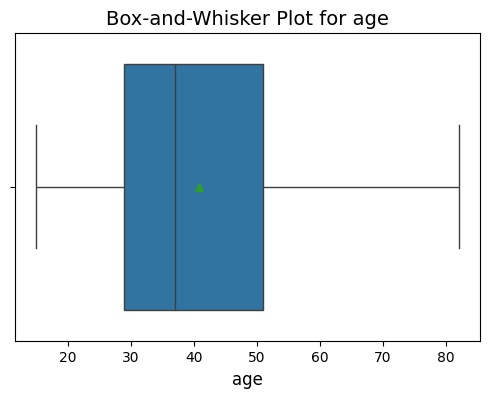

In [9]:
# Doing the age column as the only continous value column
visualize_outliers(df, 'age')
# there are no outliers in the age column 
# reminder for me,
    # the line in the box is the median
    # the green triangle is the mean

# Univariate Analysis

In [ ]:
# Descriptive statistics for numerical columns in entire df

df.describe()
# asking for descriptive stat on the entire df 
# Age is the only column with continuous value so descriptive analysis will work better on it
# the other columns that appear are using binary 1 and 0 which can work somewhat with descriptive stat

In [ ]:
# Histogram for numerical columns in entire df

sns.histplot(df, kde=True, bins=30)  # Adjust column name
plt.title('Histogram of Age')
plt.show()

In [ ]:
sns.histplot(df['age'], kde=True, bins=30)  # Adjust column name
plt.title('Histogram of Age')
plt.show()

In [ ]:
# Density plot for a numerical column
sns.kdeplot(df['age'], shade=True)
plt.title('Density Plot of Age')
plt.show()


In [ ]:
# Correlation heatmap for a set of numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
sns.pairplot(df)
plt.show()

# Other

# Checking Column Type (Categorical or Numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   383 non-null    int64 
 1   gender                383 non-null    object
 2   smoking               383 non-null    object
 3   hx_smoking            383 non-null    object
 4   hx_radiotherapy       383 non-null    object
 5   thyroid_function      383 non-null    object
 6   physical_examination  383 non-null    object
 7   adenopathy            383 non-null    object
 8   pathology             383 non-null    object
 9   focality              383 non-null    object
 10  risk                  383 non-null    object
 11  t                     383 non-null    object
 12  n                     383 non-null    object
 13  m                     383 non-null    object
 14  stage                 383 non-null    object
 15  response              383 non-null    ob

In [11]:
df.head()

,age,gender,smoking,hx_smoking,hx_radiotherapy,thyroid_function,physical_examination,adenopathy,pathology,focality,risk,t,n,m,stage,response,recurrence
0,27,f,no,no,no,euthyroid,single_nodular_goiter-left,no,micropapillary,uni-focal,low,t1a,n0,m0,i,indeterminate,no
1,34,f,no,yes,no,euthyroid,multinodular_goiter,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
2,30,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
3,62,f,no,no,no,euthyroid,single_nodular_goiter-right,no,micropapillary,uni-focal,low,t1a,n0,m0,i,excellent,no
4,62,f,no,no,no,euthyroid,multinodular_goiter,no,micropapillary,multi-focal,low,t1a,n0,m0,i,excellent,no


In [12]:
# numeric columns
    # 'age'

# categorical columns
    # everything except for 'age'
    # alot of these can definitely be converted to numeric columns in feature engineering step

# Distribution of Values within Each Column

In [ ]:
# I want to see the count / distribution and roughly the proportion of values within each column as a way to explore the data
# Bar graph for each categorical column
# Histogram for each numerical column

In [26]:
# the main wrapper function will quickly run them all but if any column seems to be interesting (like maybe need to modify the bin number on a particular histogram) then I can use the inidividal function as well 

def quick_bar_graph(df, col_name):
    df[col_name].value_counts().plot(kind='bar', figsize=(5, 2.5))
    plt.title(f'Bar Graph of {col_name} Column')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()


def quick_histogram(df, col_name, bins=10):
    df[col_name].plot(kind='hist', bins=bins, figsize=(5, 2.5), edgecolor='black')
    plt.title(f'HIstogram of {col_name} Column')
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.show()


def plot_all_graphs(df, col_names='all', histo_bins = 10):
    if col_names == 'all':
        col_names = df.columns.tolist()
    
    for col_name in col_names:
        col_type = df[col_name].dtype
        
        # Check if the column is numeric (integer or float)
        if col_type in ['int64', 'int32', 'int16', 'int8', 'float64', 'float32']:
            quick_histogram(df, col_name)
        # Check if the column is string, object, or category for bar plot
        elif col_type in ['object', 'category', 'string']:
            quick_bar_graph(df, col_name)
        # If the column is not a supported type, print a message
        else:
            print(f"Did not graph column '{col_name}' because it is of type {col_type}.")


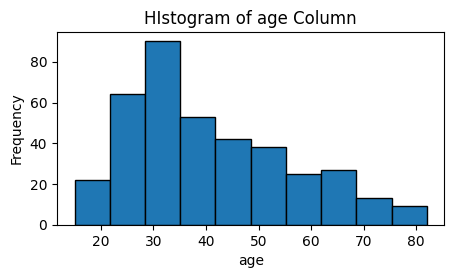

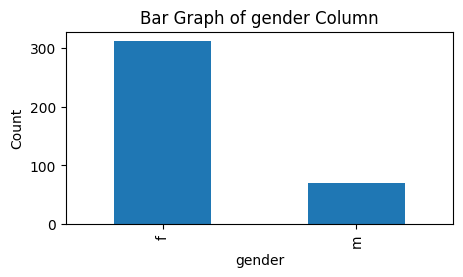

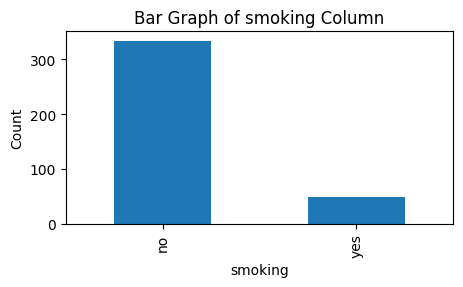

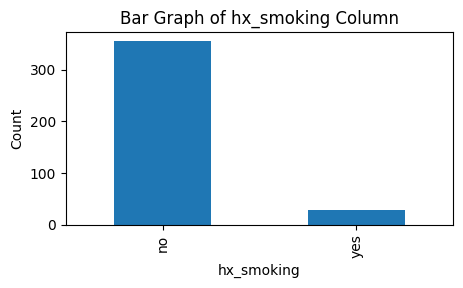

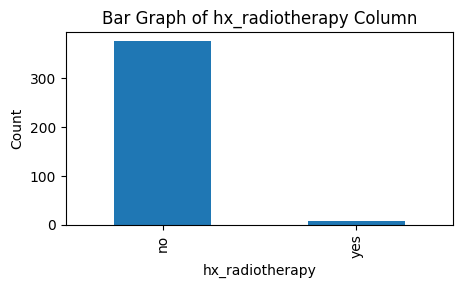

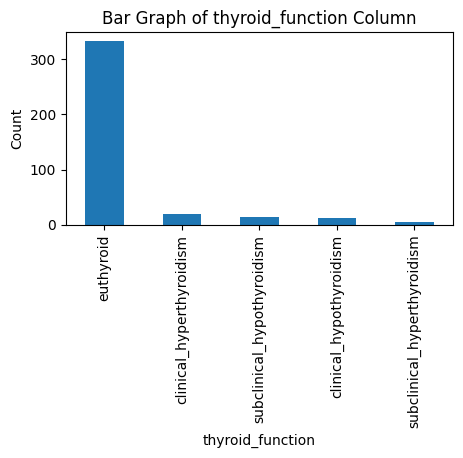

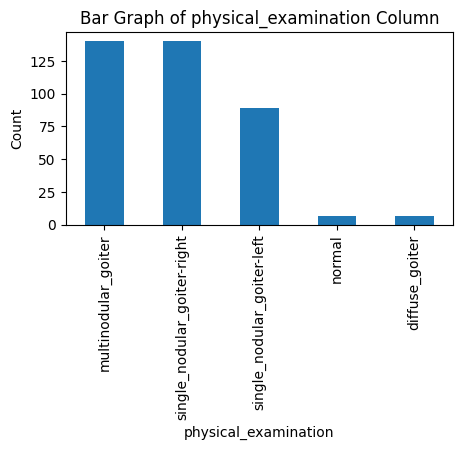

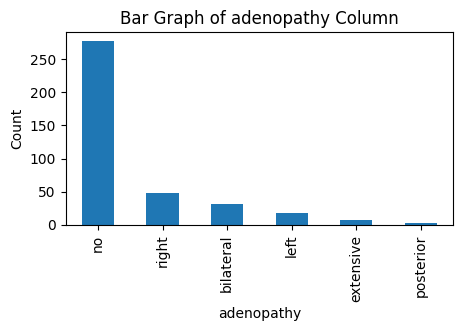

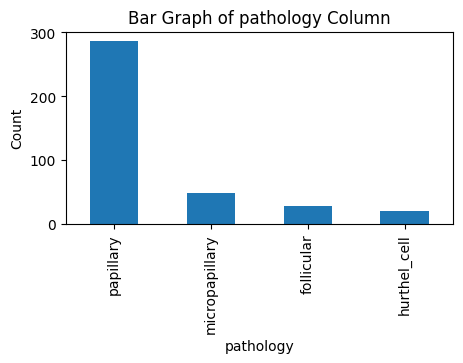

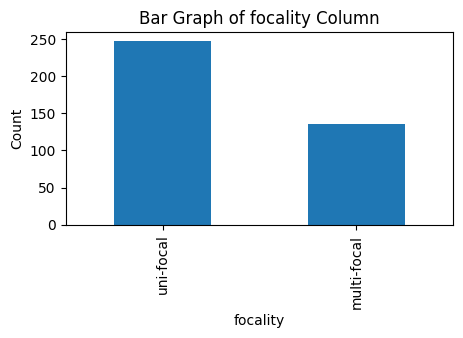

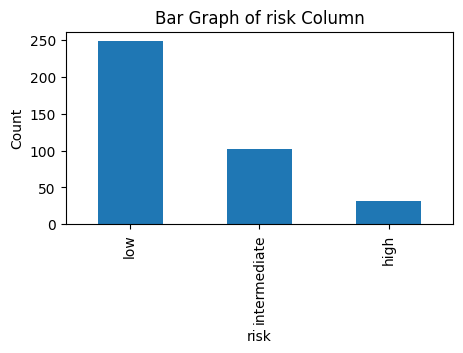

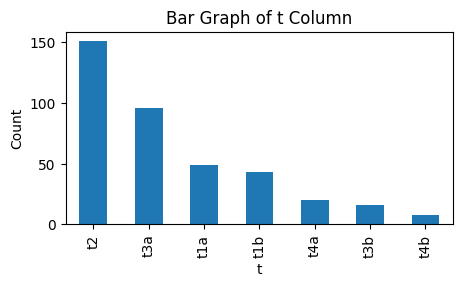

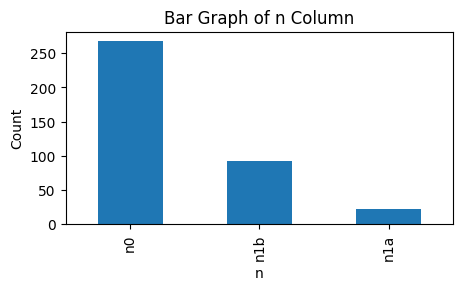

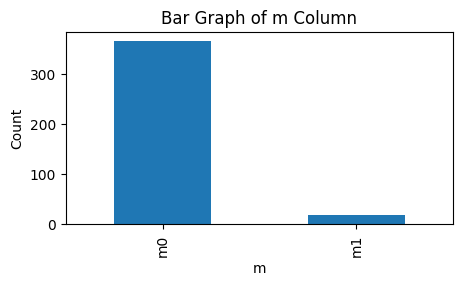

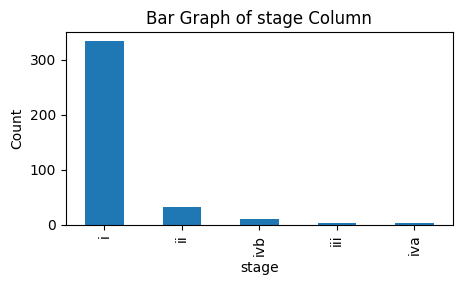

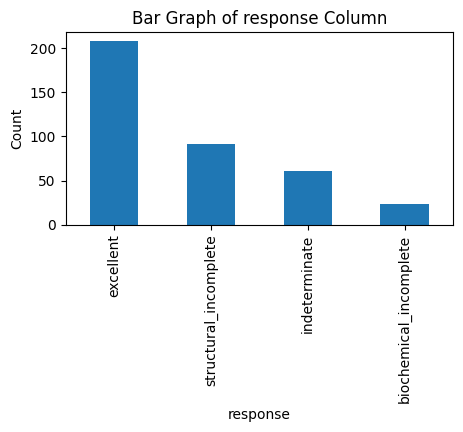

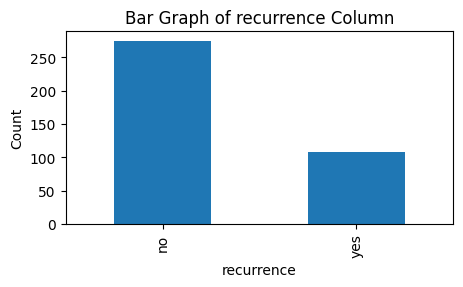

In [27]:
plot_all_graphs(df,'all',histo_bins = 10)

In [ ]:
# Create a contingency table
df_stacked = pd.crosstab(df['smoking'], df['response'])

# Plot a stacked bar chart
df_stacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Smoking vs Response')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()


In [ ]:
# Violin plot for `age` vs `response`
plt.figure(figsize=(8, 6))
sns.violinplot(x='response', y='age', data=df)
plt.title('Age Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

# Box plot for `age` vs `thyroid_function`
plt.figure(figsize=(8, 6))
sns.boxplot(x='thyroid_function', y='age', data=df)
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['hx_smoking'], df['response'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)


In [ ]:
sns.pairplot(df, hue='response', vars=['age'], diag_kind='kde', height=4)
plt.title('Pairplot with Age and Response')
plt.show()
